# Classifying Patient Mortality from Breast Cancer Data

Breast cancer is the most common malignancy among Canadian women (excluding non-melanoma skin cancers). It is the second most typical cancer-related cause of mortality among Canadian women. 

Projections show that in 2022:

* 28,600 Canadian women will be diagnosed with breast cancer. This will represent 25% of all new cases of cancer in women in 2022.

* 5,500 Canadian women will die from breast cancer. This will be the cause of 14% of all female cancer deaths in 2022.

* 78 Canadian women will be told they have breast cancer every day.

* In Canada, 1 in 8 women will eventually get breast cancer, and 1 in 34 will pass away from it. 


The clinical stage to which the cancer has progressed when diagnosed is one of the most important factors in determining the prognosis and ultimate survival of patients. 



*TEAM NOTE: Can we take out the following section?*

Invasive ductal carcinoma (IDC), which makes up around 80% of cases, is one of the most common types of breast cancer. It is particularly dangerous since it is nefarious and has the capacity to spread. To get minute tissue samples, a biopsy is commonly carried out. A pathologist will next evaluate if the patient has IDC, an additional kind of breast cancer, or is in good health. 

This dataset of breast cancer patients was published in the November 2017 update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset includes female patients who were diagnosed with infiltrating ductal and lobular carcinoma in their breasts between 2006 and 2010 (SEER primary cites recode NOS histology codes 8522/3). 4024 people were ultimately included after patients with unsure tumour sizes, explored regional LNs, positive regional LNs, and patients with survival periods of less than a month were all excluded. 

## Project Goal

Using the classification techniques to be learned in class, we hope to build classification models for prediction using variables from the breast cancer dataset (found off kaggle and stored on github [here](https://raw.githubusercontent.com/achinth-b/stat-301-project/main/Breast_Cancer.csv)). Our goal is to build the best predictvie model we can with the concepts learned in class. Predictors used in our models will be selected using the variable selection concepts learned in class. Models will be evaluated using appropriate measures for the test set MSE, and a discussion for selecting the best model would be included. 



## Description of Variables


Amounting our target variable of patient status, we have sixteen features at our disposal to conduct our analysis and prediction. They are as follows: 

* **Age**: Age of breast cancer patient in years. 

* **Race**: One of White, Black or Other (American Indian/AK Native, Asian/Pacific Islander).

* **Marital Status**: One of Married, Divorced, Single, Widowed or Separated

* **T Stage**: One of T1, T2, T3 or T4. The T stage describes the size and scope of the primary tumour. Typically, the primary tumour is referred to as the main tumour. The major tumor's size or extension is indicated by the letters T1, T2, T3, and T4. The size of the tumour or the extent of its invasion into neighbouring tissues is indicated by the number after the T. T-T0: There is no sign of a primary tumour. T1 (includes T1a, T1b, and T1c): Tumor is less than or equal to 2 cm (3/4 inch) in size. T2: Tumor has a diameter of at least 2 cm but no greater than 5 cm (2 inches). T3: Tumor is larger than 5 cm in diameter.

* **N Stage**: One of N1, N2 or N3. Typically, the primary tumour is referred to as the main tumour. The N stands for the number of cancerous lymph nodes in the area. The M indicates whether or not the malignancy has spread. This indicates that the cancer has spread outside of the body's original tumour. N1, N2, and N3: These terms describe the quantity and location of lymph nodes that are cancerous. The more cancerous lymph nodes there are, the higher the number following the N.

* **6th Stage**: One of IIA, IIIA, IIIC, IIB or IIIB. Combining the T, N, and M categories, the tumour grade, and the outcomes of ER/PR and HER2 tests, doctors determine the cancer stage.
If surgery is the initial step in treating your cancer, your doctor will often determine the cancer's stage after the final testing results are in, typically 5 to 7 days following surgery.
The stage of the malignancy is largely established clinically when systemic treatment is administered before surgery, which is frequently with drugs and is referred to as neoadjuvant therapy.
Stage I through stage IIA cancer may be referred to by doctors as "early stage" and stage IIB to stage III as "locally advanced."

* **Diffrentiate**: One of Well Diffrentiated, Moderately Diffrentiated, Poorly Diffrentiated, or Undiffrentiated. 

* **Grade**: One of 1, 2, 3, or anaplastic; Grade IV. 

* **A Stage**: One of Regional or Distant.  Regional — A neoplasm that has extended, Distant — A neoplasm that has spread to parts of the body remote from

* **Tumor Size**: 

* **Estrogen Status**:

* **Progesterone Status**:

* **Regional Node Examined**:

* **Regional Node Positive**:

* **Survival Months**:

* **Status**: One of Alive or Dead.

>_*TEAM NOTE*_ we need to finish this data explanation of each one of the variables. feel free to delete my volume of text if it destroys the word count. 

## Exploratory Data Analysis

### Loading Necessary Libraries

In [36]:
library(tidyverse)
library(GGally)

Warning message:
"package 'GGally' was built under R version 4.2.2"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



### Load data 

In [26]:
cancer_dataset = read.csv('https://raw.githubusercontent.com/achinth-b/stat-301-project/main/Breast_Cancer.csv')
colnames(cancer_dataset)[14] = "Regional.Node.Positive"
head(cancer_dataset, n = 5)

,Age,Race,Marital.Status,T.Stage,N.Stage,X6th.Stage,differentiate,Grade,A.Stage,Tumor.Size,Estrogen.Status,Progesterone.Status,Regional.Node.Examined,Regional.Node.Positive,Survival.Months,Status
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>
1,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
2,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
3,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
4,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
5,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


### Data Preprocessing

>_*TEAM NOTE*_ We need to change the values for our categorical variables as factors so they will be compliant for the models. 
>_*DONE*

Changing categorical variables into factors:

In [25]:
col_names <- c(2:9,11:12)
cancer_dataset[,col_names]<-lapply(cancer_dataset[,col_names], factor)
head(cancer_dataset)

,Age,Race,Marital.Status,T.Stage,N.Stage,X6th.Stage,differentiate,Grade,A.Stage,Tumor.Size,Estrogen.Status,Progesterone.Status,Regional.Node.Examined,Regional.Node.Positive,Survival.Months,Status
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<chr>
1,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
2,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
3,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
4,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
5,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
6,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive


## Preliminary Observations of data

In [27]:
column_names = colnames(cancer_dataset)
features = column_names[-length(column_names)]
features
cat("The dimensions of our dataset are: ", dim(cancer_dataset))

[1] "Age"                    "Race"                   "Marital.Status"        
 [4] "T.Stage"                "N.Stage"                "X6th.Stage"            
 [7] "differentiate"          "Grade"                  "A.Stage"               
[10] "Tumor.Size"             "Estrogen.Status"        "Progesterone.Status"   
[13] "Regional.Node.Examined" "Regional.Node.Positive" "Survival.Months"

The dimensions of our dataset are:  4024 16

We have fifteen possible features, listed above that can help us gauge the status of a patient given these features of their cancer condition. 

In [28]:
glimpse(cancer_dataset)

Rows: 4,024
Columns: 16
$ Age                    <int> 68, 50, 58, 58, 47, 51, 51, 40, 40, 69, 68, 46,…
$ Race                   <chr> "White", "White", "White", "White", "White", "W…
$ Marital.Status         <chr> "Married", "Married", "Divorced", "Married", "M…
$ T.Stage                <chr> "T1", "T2", "T3", "T1", "T2", "T1", "T1", "T2",…
$ N.Stage                <chr> "N1", "N2", "N3", "N1", "N1", "N1", "N1", "N1",…
$ X6th.Stage             <chr> "IIA", "IIIA", "IIIC", "IIA", "IIB", "IIA", "II…
$ differentiate          <chr> "Poorly differentiated", "Moderately differenti…
$ Grade                  <chr> "3", "2", "2", "3", "3", "2", "1", "2", "3", "1…
$ A.Stage                <chr> "Regional", "Regional", "Regional", "Regional",…
$ Tumor.Size             <int> 4, 35, 63, 18, 41, 20, 8, 30, 103, 32, 13, 59, …
$ Estrogen.Status        <chr> "Positive", "Positive", "Positive", "Positive",…
$ Progesterone.Status    <chr> "Positive", "Positive", "Positive", "Positive",…
$ Regional.Node.

This information allows us to ensure that our datatypes for our categorical variables are all of the correct type `factor` and `int` or `double` for our continuous variables. 

In [29]:
is.null(cancer_dataset)

[1] FALSE

Our dataset also has 0 null valued poitns, which makes it easier for us as we do not need to get rid of any of our training examples. 

In [53]:
summary(cancer_dataset)

      Age            Race           Marital.Status       T.Stage         
 Min.   :30.00   Length:4024        Length:4024        Length:4024       
 1st Qu.:47.00   Class :character   Class :character   Class :character  
 Median :54.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :53.97                                                           
 3rd Qu.:61.00                                                           
 Max.   :69.00                                                           
   N.Stage           X6th.Stage        differentiate         Grade          
 Length:4024        Length:4024        Length:4024        Length:4024       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

## Class Imbalance of Response Variable

As we are trying to investigate a classification problem, we want to see if there is any heavy class imbalance in our data. We visualize the class distribution with a bar chart below:

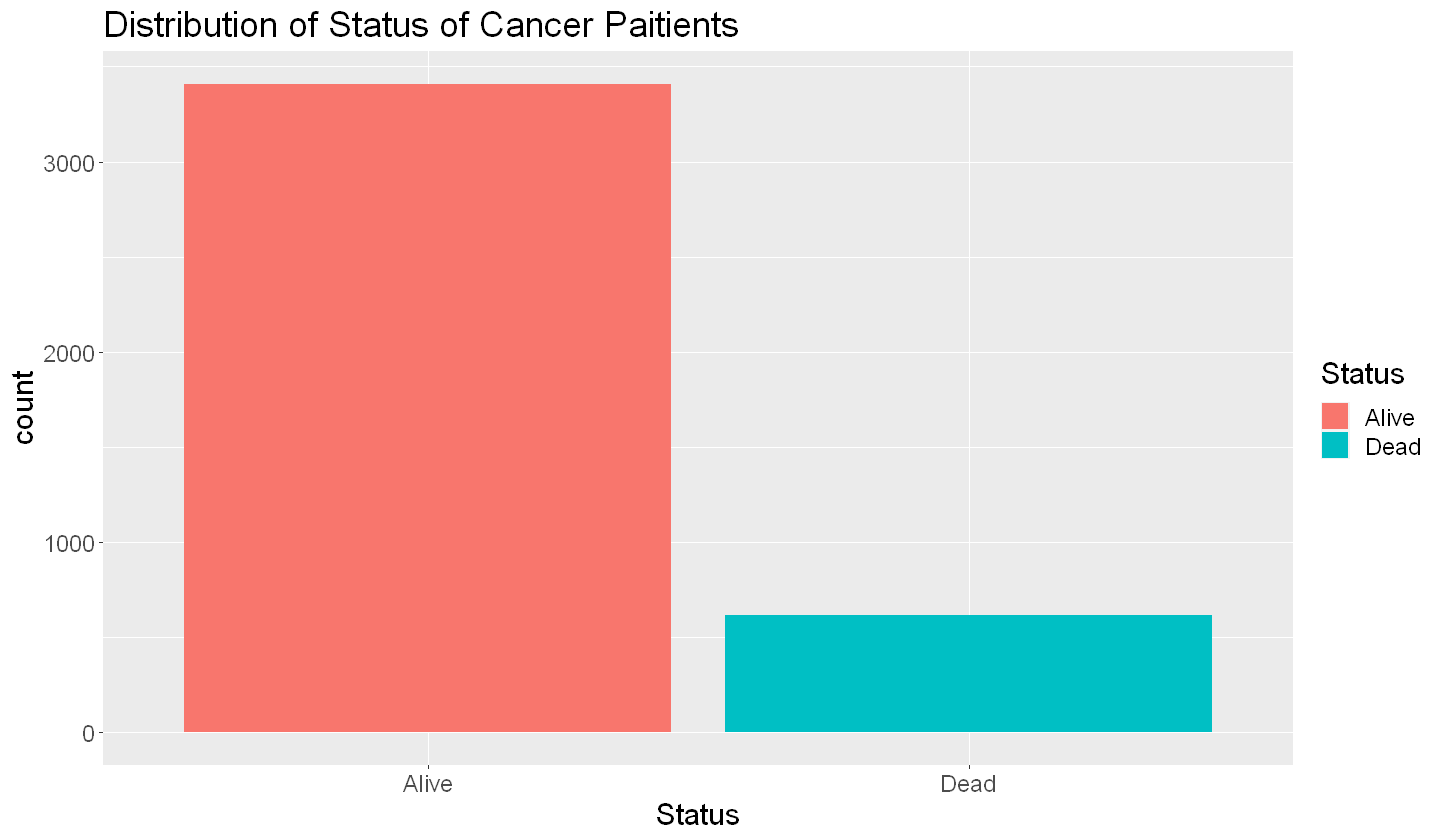

In [51]:
# visualizing the distribution of classes 
options(repr.plot.width = 12, repr.plot.height = 7)

cancer_dataset %>%
    ggplot(aes(x=Status)) +
    geom_bar(aes(fill=Status)) +
    labs(title="Distribution of Status of Cancer Paitients") +
    theme(text = element_text(size=18))

We see that there are a lot more patients alive than dead in our dataset. From a human perspective this is a good thing, but from a data analytics point of view this is an issue, as we do not want a classifier which would only predict patients to be alive and still have a low error classification rate. One way we can tackle this issue is that when we form our training and validation set, we can sample with replacement, which would hopefully cause the classes to be more balanced when we train and test the data. However, as we do not have too much knowledge on how to solve this issue, further investigation into how to solve this problem is necessary. 

## Checking for multicollinearity

We check for multicollinearity between quantitative variables through scatterplots: 

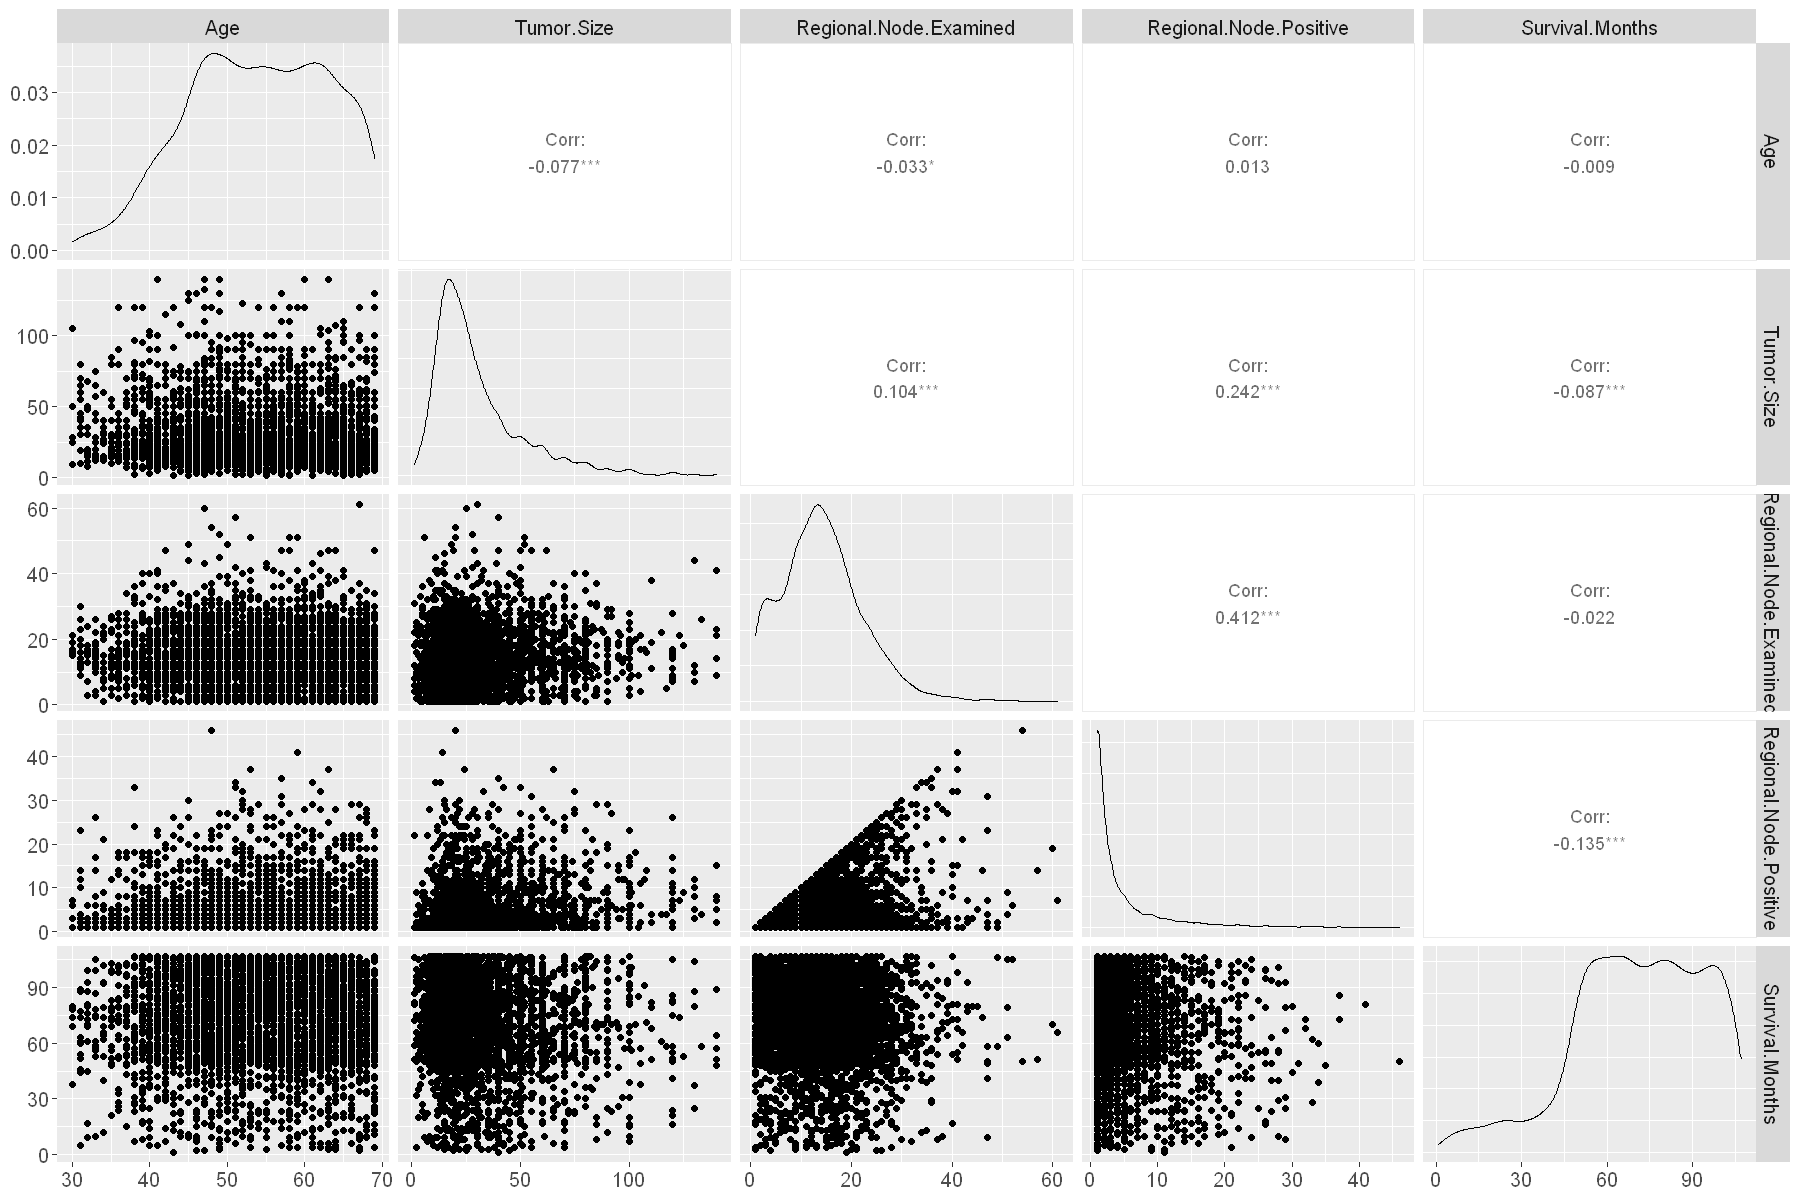

In [39]:
options(repr.plot.width = 15, repr.plot.height = 10)

cancer_dataset_quan <- cancer_dataset %>% 
    select(Age, Tumor.Size, Regional.Node.Examined, Regional.Node.Positive, Survival.Months)

ggpairs(cancer_dataset_quan) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

From examining the plots above, many of the plots seem to have points randomly scattered with no obvious pattern, suggesting that a majority of the predictors do not have much correlation with each other. However, from examining the scatterplot between `Regional.Node.Examined` and `Regional.Node.Positive`, we observe that the points form a funnel shape with the x-axis. From this, we suspect that these predictors would have higher correlation than other pairs of predictors. Checking with the upper triangular portion of the graphic, we see that most correlation values are low, with exception of the pairs (`Regional.Node.Poistive`, `Tumor.Size`) and (`Regional.Node.Poistive`, `Regional.Node.Examined`). These pairs have correlation values of $0.242$ and $0.412$ respectively. 

Overall, predictors are not very correlated with one another, as the magnitude of correlation values are not larger than $0.5$. 

## Methods for Experimentation 

>_*TEAM NOTE*_ rough outline for how we're gonna do the project; still needs to be put into sentences; feel free to add on to this

1) look into different ways of solving the class imbalance issue, decide on a method to counteract this problem

2) Set aside 20% of our data to use as a test set, use solution to class imbalance issue to form training and validation sets

3) train poisson and logistic classification models, use cross validation and variable selection to select the best variables for the respective models + see which subset of models fits the data the best

4) estimate test MSE using Mallow's Cp, Aic, or Bic; choose best model

5) compare performance of best model to test data, discuss results

## References

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0250370
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4127616/
https://cancer.ca/en/cancer-information/cancer-types/breast/prognosis-and-survival/survival-statistics